In [139]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.patches as mpatches
import os

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
recent_row = session.query(Measurement).first()
recent_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe639638908>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [32]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Find the most recent date in the data set.
recent_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_row

('2017-08-23')

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
recent_row

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores

aug_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "08").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    filter(func.strftime("%d", Measurement.date) >= "23").\
                    order_by(Measurement.date).all()

sept_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "09").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

oct_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "10").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

nov_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "11").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

dec_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "12").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

jan_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "01").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

feb_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "02").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

mar_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "03").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

apr_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "04").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

may_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "05").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

jun_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "06").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

jul_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "07").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

aug_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "08").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    filter(func.strftime("%d", Measurement.date) <= "23").\
                    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
aug_16_df = pd.DataFrame(aug_16, columns=['date','prcp'])
sept_16_df = pd.DataFrame(sept_16, columns=['date','prcp'])
oct_16_df = pd.DataFrame(oct_16, columns=['date','prcp'])
nov_16_df = pd.DataFrame(nov_16, columns=['date','prcp'])
dec_16_df = pd.DataFrame(dec_16, columns=['date','prcp'])
jan_17_df = pd.DataFrame(jan_17, columns=['date','prcp'])
feb_17_df = pd.DataFrame(feb_17, columns=['date','prcp'])
mar_17_df = pd.DataFrame(mar_17, columns=['date','prcp'])
apr_17_df = pd.DataFrame(apr_17, columns=['date','prcp'])
may_17_df = pd.DataFrame(may_17, columns=['date','prcp'])
jun_17_df = pd.DataFrame(jun_17, columns=['date','prcp'])
jul_17_df = pd.DataFrame(jul_17, columns=['date','prcp'])
aug_17_df = pd.DataFrame(aug_17, columns=['date','prcp'])

#Combine DataFrames
from functools import reduce


dfs = [aug_16_df,sept_16_df,oct_16_df,nov_16_df,dec_16_df,
            jan_17_df,feb_17_df,mar_17_df,apr_17_df,may_17_df,
            jun_17_df,jul_17_df,aug_17_df]
nan_value = 0

prcp_year_aug_16_17 = pd.concat(dfs).fillna(nan_value)


# Sort the dataframe by date
prcp_year_aug_16_17 = prcp_year_aug_16_17.sort_values('date',ascending=True)
prcp_year_aug_16_17



,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02
...,...,...
86,2017-08-22,0.50
89,2017-08-23,0.08
87,2017-08-23,0.00
88,2017-08-23,0.00


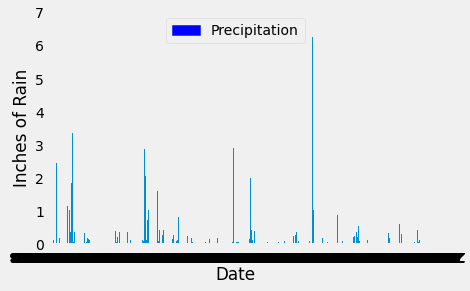

In [167]:
# Use Pandas Plotting with Matplotlib to plot the data
blue_patch = mpatches.Patch(color='blue', label='Precipitation')
prcp_year_aug_16_17.set_index('date', inplace=True)
prcp_year_aug_16_17.plot.bar()
plt.xlabel("Date")
plt.ylabel("Inches of Rain")


plt.legend(handles=[blue_patch])
plt.xticks(rotation=180)
plt.grid()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [168]:
# Design a query to calculate the total number stations in the dataset
recent_row = session.query(Station).first()
recent_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe63fa6a6d8>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [177]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [179]:
stations = session.query(Station.station, Station.name, Station.latitude, Station.longitude).\
            group_by(Station.station).\
            order_by(Station.station).all()
stations

[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139)]

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()